# Lesson - Machine Learning XII: Deep Learning

The commonly used supervised machine learning algorithms are:
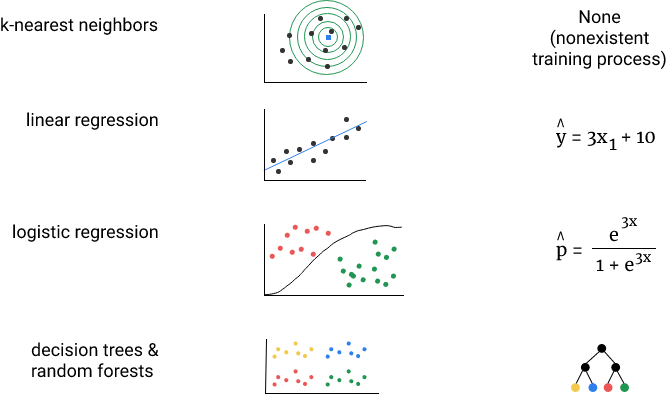

Because these are all supervised machine learning models, we repeat a similar workflow when using each model:

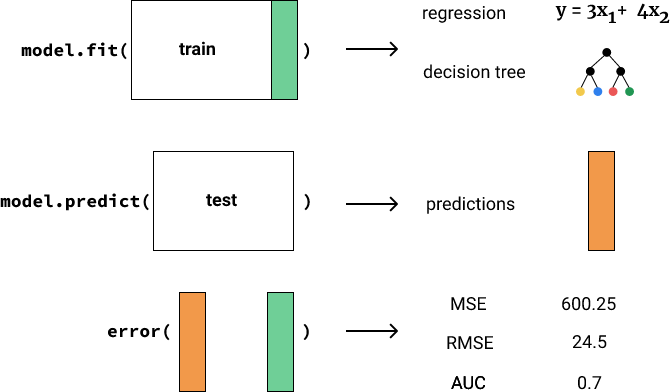

We will now discuss, a new type of model called **artificial neural networks**. 

Artificial neural networks (or neural networks for short) draw some inspiration from biological neural networks, which describe how the cells in most brains (including ours) are connected and how they work together. Each cell in a neural network is called a neuron and is connected to multiple neurons. Neurons in human (and mammalian) brains communicate by sending electrical signals between each other.
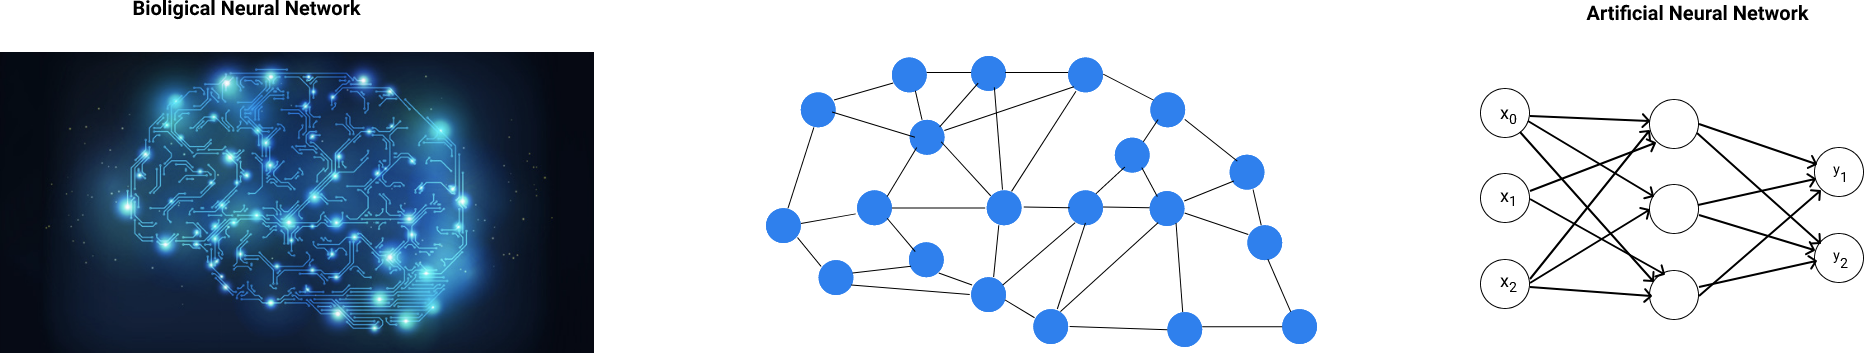

Neural network models were inspired by the structure of neurons in our brain and message passing between neurons, but the similarities between how biological neural networks and artificial neural networks end here.

### Non-linear Models
A deep neural network is a specific type of neural network that excels at capturing nonlinear relationships in data. Deep neural networks have broken many benchmarks in audio and image classification. Previously, linear models were often used with nonlinear transformations that were discovered by hand through research.

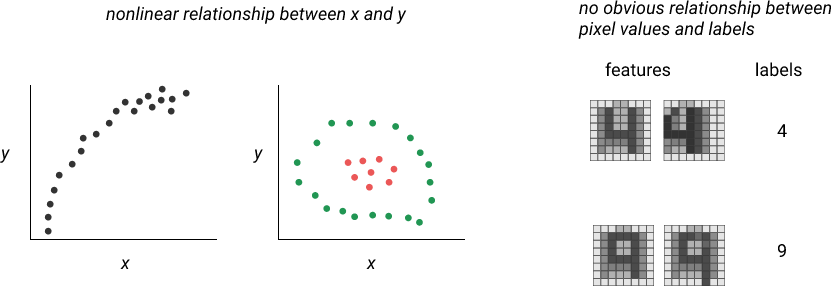

Deep neural networks have some ability to discover how to structure the nonlinear transformations during the training process automatically and have grown to become a helpful tool for many problems.

In this section, we'll focus on becoming familiar with how neural networks are represented and how to represent linear regression and logistic regression models in that representation. In later sections, we'll learn how to introduce nonlinearity in our networks, how to fit complex neural networks, and some real world best practices

## Sec-I: Representing Neural Networks

### Introduction to Graphs
Neural networks are usually represented as graphs. A graph is a data structure that consists of nodes (represented as circles) that are connected by edges (represented as lines).

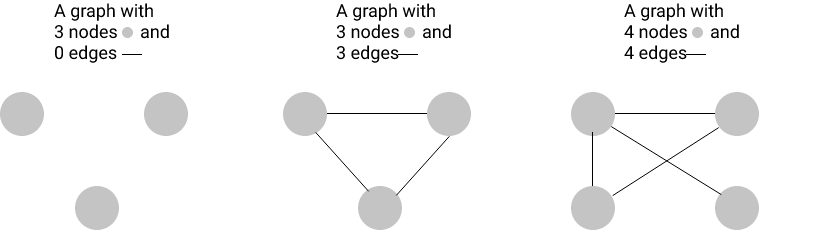

Graphs are commonly used to represent how components of a system are related or linked. For example, the Facebook Social Graph describes how all of the users on Facebook are connected to each other (and this graph is changing constantly as friends are added and removed). Google Maps uses graphs to represent locations in the physical world as nodes and roads as edges.

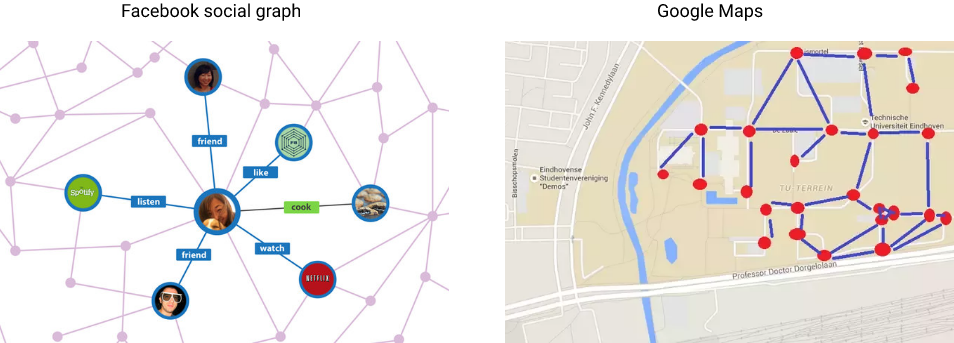

Graphs are a highly flexible data structure; we can even represent a list of values as a graph. Graphs are often categorized by their properties, which act as constraints. We can read about the many different ways graphs can be categorized on [Wikipedia](https://en.wikipedia.org/wiki/Graph_%28discrete_mathematics%29#Types_of_graphs). One way graphs can be categorized is the presence of edge direction.
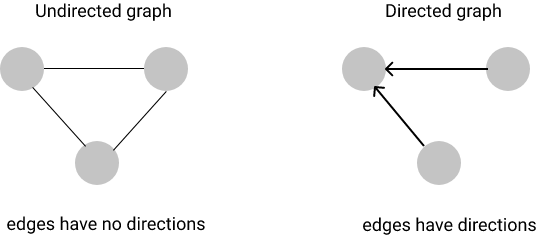

Within directed graphs, graphs are either cyclic or acyclic.
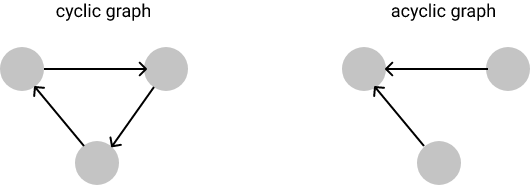

### Computational Graphs
Graphs provide a mental model for thinking and reasoning about a specific class of models -- those that consist of a series of functions that are executed in a specific order. In the context of neural networks, graphs let us compactly express a pipeline of functions that we want to be executed in succession. e.g.
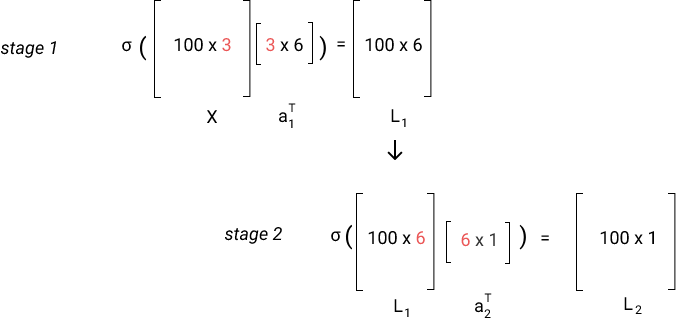

This pipeline has 2 stages of functions that happen in sequence:
- In the first stage, L1 is computed: $L_1 = X{a_1}^T$
- In the second stage, L2 is computed:: $L_2 = L_1{a_2}^T$

The second stage can't happen without the first stage, because L1 is an input to the second stage. As we'll see, at the heart of neural network models is the successive computation of functions. This is known as a computational graph. A computational graph uses nodes to describe variables and edges to describe how variables are combined. Here's a simple example:
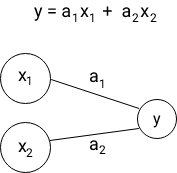

The computational graph is a powerful representation, as it allows us to compactly represent models with many layers of nesting. In fact, a decision tree is really a specific type of computational graph. There's no compact way to express a decision tree model using just equations and standard algebraic notation.
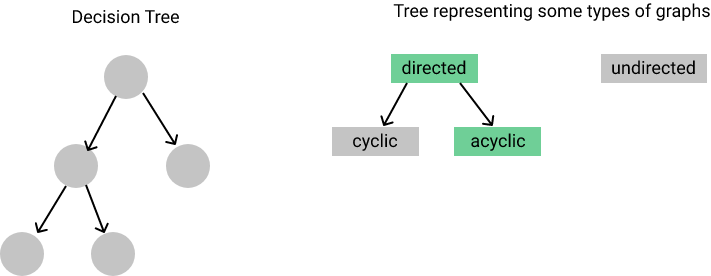

To get more familiar with this representation, we'll represent a linear regression model using neural network notation. This will help us get more comfortable with this unique representation and allow us to explore some of the neural network terminology as well.


### A Neural Network that Performs Linear Regression

A linear regression model is represented as:
$$\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$$

Where:

`a0` represents the intercept (also known as the bias)
`a1` to `an` represent the trained model weights
`x1` to `xn` represent the features
`ˆy`
  represents the predicted value
  
  The first step is to rewrite this model using linear algebra notation, as a product of two vectors:
  $Xa^T  =  \hat{y}$
  
  Here's a concrete example of this model;
  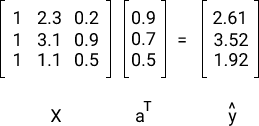

**Neural Network Representation**

In the neural network representation of this model:

each **feature** column in a data set is represented as an **input neuron**
each **weight** value is represented as an arrow from the feature column it multiples to the **output neuron**
The neurons and arrows act as a visual metaphor for the weighted sum, which is how the feature columns and weights are combined.

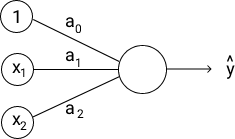



Inspired by biological neural networks, an **activation function** determines if the neuron fires or not. In a neural network model, the activation function transforms the weighted sum of the input values. For this network, the activation function is the identity function. The identity function returns the same value that was passed in:
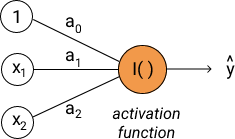

While the activation function isn't interesting for a network that performs linear regression, it's useful for logistic regression and more complex networks. Here's a comparison of both representations of the same linear regression model:
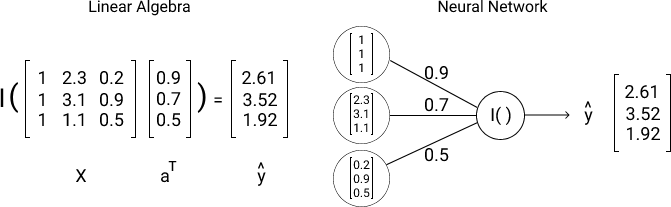

### Generating Regression Dataset

We'll work with data that we'll generate ourselves, instead of an external data set. Generating data ourselves gives us more control of the properties of the data set (e.g. like the number of features, observations, and the noise in the features). Data sets where neural networks excel contain the same non-linearity, so we can generalize the learnings to real data sets as well.

Scikit-learn contains the following convenience functions for generating data:

- [sklearn.datasets.make_regression()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
- [sklearn.datasets.make_classification()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
- [sklearn.datasets.make_moons()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)

The following codes generates a regression data set with `3` features, `1000` observations, and a random seed of `1` and returns a tuple of two NumPy objects.

The features are stored in the first NumPy array and the labels in the second NumPy array. We can then use the pandas.DataFrame() constructor to create dataframes:

In [1]:
from sklearn.datasets import make_regression
data = make_regression(n_samples=100, n_features=3, random_state=1)
print(type(data))

<class 'tuple'>


In [2]:
# Fetures
features = data[0]
print(features)

[[ 1.29322588e+00 -6.17362064e-01 -1.10447026e-01]
 [-2.79308500e+00  3.66332015e-01  1.93752881e+00]
 [ 8.01861032e-01 -1.86569772e-01  4.65672984e-02]
 [ 1.29101580e-01  5.02740882e-01  1.61694960e+00]
 [-6.91660752e-01 -6.87172700e-01 -3.96753527e-01]
 [-7.54397941e-01  5.12929820e-01  1.25286816e+00]
 [ 1.90465871e+00  6.59049796e-01  1.11105670e+00]
 [ 2.01830179e-01  1.79215821e+00  6.61020288e-01]
 [ 4.22137467e-02 -1.10061918e+00  5.82815214e-01]
 [-1.39649634e+00 -5.04465863e-01 -1.44411381e+00]
 [-3.10116774e-01  1.03882460e+00 -2.43483776e+00]
 [ 8.36004719e-01  7.58805660e-01  1.54335911e+00]
 [-8.45080274e-02  4.17302005e-01 -2.97361883e-01]
 [-8.90555584e-01  1.95607890e+00 -1.11911540e+00]
 [-9.35769434e-01  5.30355467e-01 -2.67888080e-01]
 [ 1.55880554e+00 -1.21974440e+00  1.09402696e-01]
 [ 8.10951673e-01 -4.00878192e-01  1.04444209e+00]
 [ 4.36689932e-02  1.33145711e+00 -2.26314243e-01]
 [ 7.42044161e-01 -8.87628964e-01 -1.91835552e-01]
 [ 1.69382433e-01 -9.53700602e-

In [3]:
# # Features First row
features[0]

array([ 1.29322588, -0.61736206, -0.11044703])

In [4]:
# Labels
labels = data[1]
labels

array([ -10.37865986,   25.5124503 ,   19.67705609,  149.50205427,
       -121.65210879,   90.29412996,  214.01379719,  224.74157328,
        -73.17331138, -195.62776209,  -52.49101402,  201.80460524,
         20.27419601,   89.16398784,   -4.43979447,  -45.4775122 ,
         56.90170664,  120.54902155,  -66.21870151,  -43.83850762,
         34.28844887,  -77.50879778,  -26.91704015,  197.19513885,
         64.4108542 ,  -58.24364135, -100.61171138,  120.30838239,
       -324.6376023 ,   11.80311373, -178.33643388,  -12.11793859,
        -25.22113932,  162.27013301,  101.22058681,  128.5378687 ,
        -21.93291701,  141.56205532,   70.77737306,   42.75618757,
       -129.88966784,   75.63153631,    7.75853852,   27.82808415,
        -56.01743267,  -45.12995511,   -4.79734991, -224.87997574,
        -74.02423583,   32.47986763, -145.77204264,   70.44079726,
        131.09675782,  152.75477314,   -5.80729922,  126.03820644,
       -194.05903549,  -16.07374331,  -64.65855618,   89.26813

In [5]:
# First label
labels[0]

-10.378659861310346

In [6]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [7]:
# Convert features into pandas dataframe
features = pd.DataFrame(features)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [8]:
# Convert labes into pandas series
labels = pd.Series(labels)
labels.describe()

count    100.000000
mean      17.569435
std      107.879563
min     -324.637602
25%      -45.216844
50%       14.792108
75%       89.524633
max      354.713999
dtype: float64

### Fitting a Liner Regression Neural Network
Because the inputs from one layer of neurons feed to the next layer of the single, output neuron, this is known as a [feedforward network](https://en.wikipedia.org/wiki/Feedforward_neural_network). In the language of graphs, a feedforward network is a directed, acyclic graph.

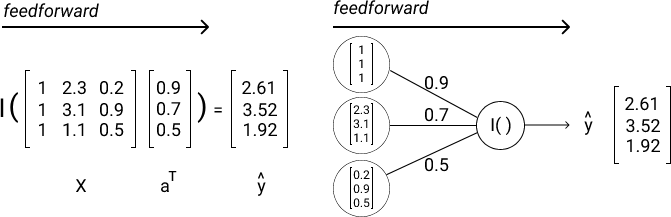

We have already explored two different approaches to training a linear regression model: `gradient descent` and `ordinary least squares`. Gradient descent is the most common technique for fitting neural network models and we'll use scikit-learn implementation of gradient descent here. This implementation lives in the [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html) class (SGD: Stochastic Gradient Descent). We use it the same way we do with the LinearRegression class:

```
from sklearn.linear_model import SGDRegressor
lr = SGDRegressor()
lr.fit(X,y)
```

Because we're focusing on building intuition, we'll be training and testing on the same data set. In real life scenarios, we always want to use a cross validation technique of some kind.

Below, we will:
- Add a column named `bias` containing the value `1` for each row to the `features` dataframe.
- Import `SGDRegressor` from `sklearn.linear_model`
- Define two functions:

 - `train(features, labels)`: takes in the `features` dataframe and `labels` series and performs model fitting.
 - Use the `SGDRegressor` class from scikit-learn to handle model fitting.
 - This function should return just a NumPy 2D array of `weights` for the linear regression model.
 
 - `feedforward(features, weights)`: takes in the features dataframe and the weights NumPy array.
 - Perform matrix multiplication between `features` (100 rows by 4 columns) and `weights` (4 rows by 1 column) and assign the result to `predictions`.
- Return `predictions`. We'll skip implementing the identity function, since it just returns the same value that was passed in.

- Run the `train()` and `feedforward()` functions. The final predictions will be stored in `linear_predictions`.

In [9]:
from sklearn.linear_model import SGDRegressor
features["bias"] = 1

def train(features, labels):
    lr = SGDRegressor()
    lr.fit(features, labels)
    # use coef_ attribute to return weights
    weights = lr.coef_
    return weights

In [10]:
def feedforward(features, weights):
    predictions = np.dot(features, weights.T) # np.T is the transpose
    return predictions

In [11]:
train_weights = train(features, labels)
linear_predictions = feedforward(features, train_weights)

### Generating Classification Data

To generate a data set friendly for classification, we can use the `make_classification()` function from scikit-learn. The following codes generates a classification data set with `4` features, `100` observations, and a random seed of `1`. The function `make_classification()` returns a tuple of two NumPy objects. Just like with the data generated from `make_regression()`, the features are stored in the first NumPy array and the labels in the second NumPy array.

In [12]:
from sklearn.datasets import make_classification
class_data = make_classification(n_samples=100, n_features=4, random_state=1)

In [13]:
# Features
class_features = class_data[0]
# Labels
class_labels = class_data[1]

In [14]:
class_features = pd.DataFrame(class_features)
class_labels = pd.DataFrame(class_labels)
class_labels.head()

,0
0,0
1,1
2,1
3,0
4,1


### Implementing a Neural Network that Performs Classification

we replicated linear regression as a feedforward neural network model and learned about nonlinear activation functions. We now have an idea of what defines a neural network. So far, we know that neural networks need:

- a network structure (how are the nodes connected? which direction does the data and computation flow?)
- a feedforward function (how are the node weights and observation values combined?)
- an activation function (what transformations on the data are performed?)
- a model fitting function (how is the model fit?)

#### Binary Classification and Logistic Regression
We'll now explore how to build a neural network that replicates a logistic regression model. In binary classification, we're interested in finding a model that can differentiate between two categorical values (usually `0` and `1` are used). The values `0` and `1` don't have any numerical weight and are instead act as numerical placeholders for the two categories. We can instead try to learn the probability that a given observation belongs in either category. 

In the language of conditional probability, we're interested in the probability that a given observation x belongs to each category:
$$P\left(y = 0 \mid x\right) = 0.3\\
P\left(y = 1 \mid x\right) = 0.7$$

Because the universe of possibilities only consists of these two categories, the probabilities for both must add up to 1. This lets us simplify what we want a binary classification model to learn:
$$P\left(y = 1 \mid x\right) =\, ?$$

If $P\left(y = 1 \mid x\right) > 0.5$ we want the model to assign it to category `1`. 
If $P\left(y = 1 \mid x\right) < 0.5$ we want the model to assign it to category `0`.

#### Implementing a Logistic Regression Model

A logistic regression model consists of two main components:

- Computing the weighted linear combination of weights and features (just like in a linear regression model): Xa^T
- Applying a transformation function to squash the result so it varies between 0 and 1: $\sigma\left(Xa^T\right)$

Combining these two steps yields the following definition of a logistic regression model: $\hat{y} = \sigma{\left(Xa^T\right)}$

In neural networks literature, this function is usually referred to as the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function): $S(x) = \frac{1} {1 + e^{-x}}$

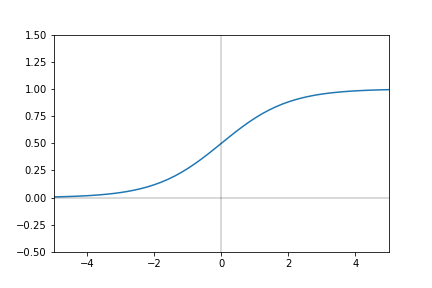

The sigmoid function has horizontal asymptotes at `0` and `1`, which means any input value will always output a value between `0` and `1`.

To implement a network that performs classification, the only thing we need to change from the linear regression network we implemented is the activation function. Instead of using the identity function, we need to use the sigmoid function.

To implement a network that performs classification, the only thing we need to change from the linear regression network we implemented is the activation function. Instead of using the identity function, we need to use the sigmoid function.

Here's a diagram of this network:
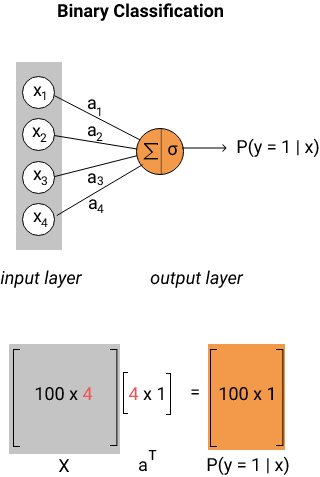

Below, we will:

- Add a column named `bias` containing the value `1` for each row to the `class_features` dataframe.
- Define three functions:
 - `log_train(class_features, class_labels`): takes in the `class_features` dataframe and `class_labels` series and performs model fitting.
  - Use the `SGDClassifier` class from scikit-learn to handle model fitting.
  - This function should return just an NumPy 2D array of weights for the logistic regression model.
 - `sigmoid(linear_combination)`: takes in a NumPy 2D array and applies the sigmoid function for every value:
 $$\dfrac{1} {1 + e^{-x}}$$
 
 - `log_feedforward(class_features, log_train_weights)`: takes in the `class_features` dataframe and the `log_train_weights` NumPy array.
 - Perform matrix multiplication between `class_features` (100 rows by 5 columns) and `log_train_weights` (1 row by 5 columns) transposed, and assign to `linear_combination`.
 - Use the `sigmoid()` function to transform `linear_combinations` and assign the result to `log_predictions`.
 - Convert each value in `log_predictions` to a class label:
  - If the value is greater than or equal to `0.5`, overwrite the value to `1`.
  - If the value is less than `0.5`, overwrite the value to `0`.
  - Return `log_predictions`
  
- Run the `log_train()` and `log_feedforward()` functions. The final predictions will be stored in `log_predictions`.

In [19]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_classification

class_data = make_classification(n_samples=100, n_features=4, random_state=1)
class_features = pd.DataFrame(class_data[0])
class_labels = pd.Series(class_data[1])

class_features["bias"] = 1

def log_train(class_features, class_labels):
    sg = SGDClassifier()
    sg.fit(class_features, class_labels)
    return sg.coef_ # coef_ attribute returns weights

In [20]:
def sigmoid(linear_combination):
    return 1/(1+np.exp(-linear_combination))

In [21]:
def log_feedforward(class_features, log_train_weights):
    linear_combination = np.dot(class_features, log_train_weights.T)
    log_predictions = sigmoid(linear_combination)
    log_predictions[log_predictions >= 0.5] = 1
    log_predictions[log_predictions < 0.5] = 0
    return log_predictions

In [22]:
log_train_weights = log_train(class_features, class_labels)
log_predictions = log_feedforward(class_features, log_train_weights)

## Sec-II: Nonlinear Activation Functions

In the last section, we became familiar with computational graphs and how neural network models are represented. We also became familiar with neural network terminology like:

- forward pass
- input neurons
- output neurons

In this section, we'll dive deeper into the role nonlinear activation functions play. To help motivate our exploration, let's start by reflecting on the purpose of a machine learning model. The purpose of a machine learning model is to transform training data inputs to the model (which are features) to approximate the training output values. We accomplish this by:

- Selecting a specific model to use
- Finding the right parameters for this model that work the best
- Testing the model to understand how well it generalizes to new data

**Linear Regression**

We use linear regression when we think that the output values can be best approximated by a linear combination of the features and the learned weights. This model is a linear system, because any change in the output value is proportional to the changes in the input values.
$$\hat{y} = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n$$

Let's now look at a situation where the output values can't be approximated effectively using a linear combination of the input values.

Logistic Regression

In a binary classification problem, the target values are 0 and 1 and the relationship between the features and the target values is nonlinear. This means we need a function that can perform a nonlinear transformation of the input features.

The sigmoid function is a good choice since all of its input values are squashed to range between 0 and 1.
$$\hat{y} = \sigma {(a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n)}$$

Adding the sigmoid transformation helps the model approximate this nonlinear relationship underlying common binary classification tasks

**Neural Networks**

Logistic regression models learn a set of weights that impact the linear combination phase and then are fed through a single nonlinear function (the sigmoid function). In this section, we'll dive into the most commonly used activation functions. The three most commonly used activation functions in neural networks are:

- the sigmoid function
- the ReLU function
- the tanh function
Since we've covered the sigmoid function already, we'll focus on the latter two functions.

### ReLU Activation Function

We'll start by introducing the **ReLU** activation function, which is a commonly used activation function in neural networks for solving regression problems. ReLU stands for **rectified linear unit** and is defined as follows:
$$\operatorname{ReLU}(x) = \max(0,x)$$

The max(0,x) function call returns the maximum value between 0 and x. This means that:

- when x is less than 0, the value 0 is returned
- when x is greater than 0, the value x is returned
Here's a plot of the function:

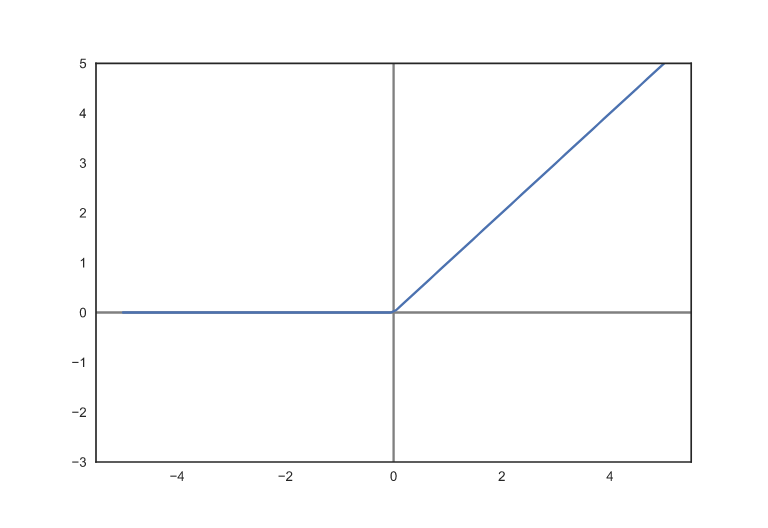

The ReLU function returns the positive component of the input value.

Below, we will:

- Define the `relu()` function.
 - This function should be able to work with a single value or a list of values.
- Call the `relu()` function, pass in x, and assign the returned value to relu_y.
- Print both `x` and `relu_y`.
- Generate a line chart with `x` on the `x-axis` and `relu_y` on the `y-axis`.

[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.10526316 0.31578947
 0.52631579 0.73684211 0.94736842 1.15789474 1.36842105 1.57894737
 1.78947368 2.        ]


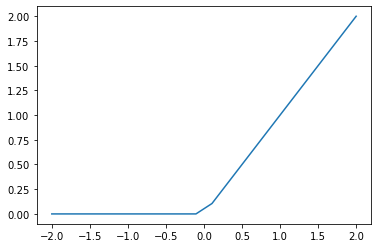

In [23]:
x = np.linspace(-2, 2, 20)
def relu(values):
    return np.maximum(values, 0)

relu_y = relu(x)

print(x)
print(relu_y)

plt.plot(x, relu_y)

### Trigonometric Functions

The last commonly used activation function in neural networks we'll discuss is the tanh function (also known as the hyperbolic tangent function). We'll start by reviewing some trigonometry by discussing the tan (short for tangent) function and then work our way up to the tanh function. What is trigonometry?

Trigonometry is short for triangle geometry and provides formulas, frameworks, and mental models for reasoning about triangles. Triangles are used extensively in theoretical and applied mathematics, and build on mathematical work done over many centuries. Let's start by clearly defining what a triangle is.

A triangle is a polygon that has the following properties:

- 3 edges
- 3 vertices
- angles between edges add up to 180 degrees
Two main ways that triangles can be classified is by the internal angles or by the edge lengths. The following diagram outlines the three different types of triangles by their edge length properties:

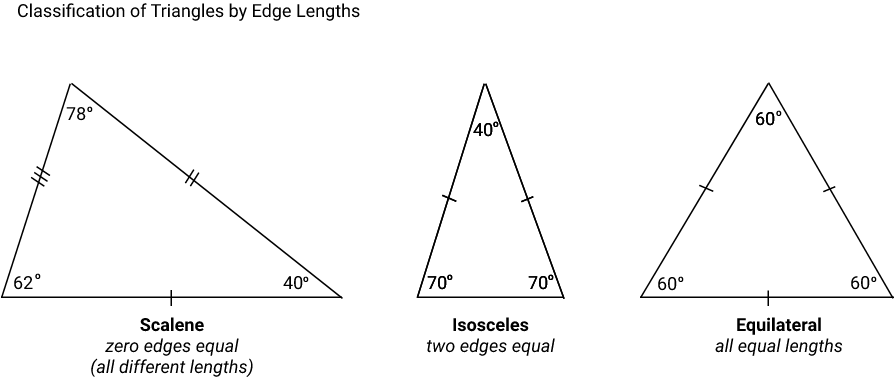

An important triangle that's classified by the internal angles is the right angle triangle. In a right angle triangle, one of the angles is 90 degrees (also known as the right angle). The edge opposite of the right angle is called the hypotenuse.

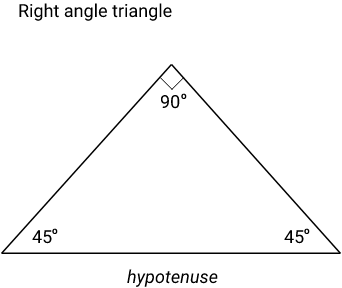

A trigonometric function is a function that inputs an angle value (usually represented as θ) and outputs some value. These functions compute ratios between the edge lengths. Here are the first 3 trigonometric functions:

$$\sin (\theta) = \frac {opposite} {hypotenuse}$$
$$\cos (\theta) = \frac {adjacent} {hypotenuse}$$
$$\tan (\theta) = \frac {opposite} {adjacent}$$

Let's define these terms further:

- Hypotenuse describes the line that isn't touching the right angle.
- Opposite refers to the line opposite the angle.
- Adjacent refers to the line touching the angle that isn't the hypotenuse.


Here's an example of the tangent function:
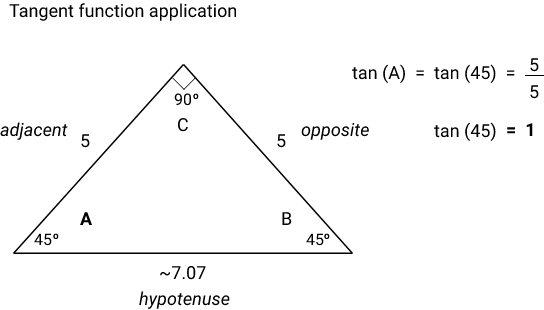


Now, how does all of this relate to Cartesian coordinate system? The key idea that lets us plot trigonometric functions on a traditional Cartesian coordinate system is the important relationship between right angle triangles and the unit circle. The unit circle is a specific type of circle where the radius is 1 (and usually centered at (0,0)). In a unit circle, any line from the center to the circle itself (in red below) forms a right angle triangle.

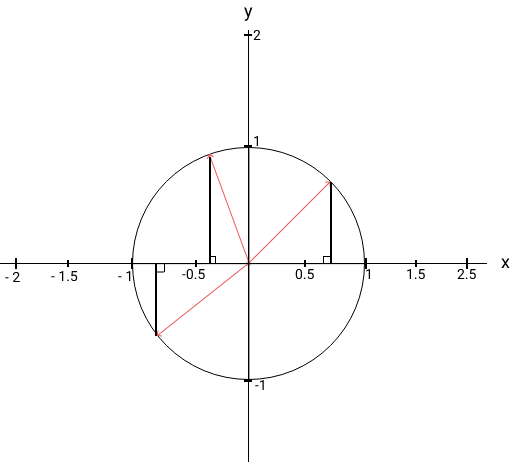

The tangent of the θ seen above is calculated by dividing the opposite edge length by the adjacent edge length.
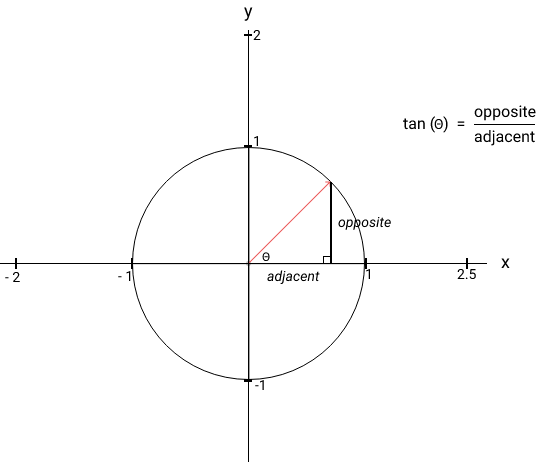

Linking the unit circle with the Cartesian coordinate system also has another happy byproduct. Doing so lets us reframe the sin and cos trigonometric functions as returning either the y or x coordinate of a point on that circle. Here's a visualization:

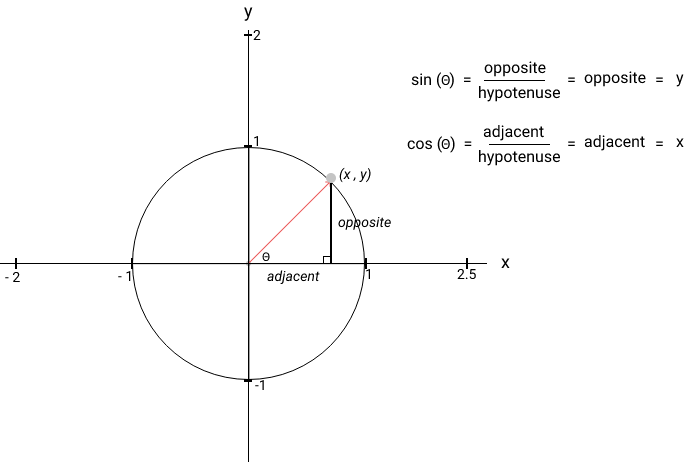

This means that the tan function (opposite / adjacent) is really just the ratio between the y value (opposite) and the x value (adjacent) for a point on the unit circle corresponding to the angle.

**Plotting Tan**

To plot the tangent function, we need to use radians on the x-axis instead of degrees. To describe a full trip around the circle, radians range from 0 to 2π while degrees range from 0 to 360.

To understand how the tan function behaves, let's compute the values from −2π to 2π.

Below, we will:

- Use the numpy.tan() function to compute the tangent of the values in `x` and assign the returned value to `tan_y`.
- Print both x and tan_y.
- Generate a line plot with `x` on the `x-axis` and `tan_y` on the `y-axis`.

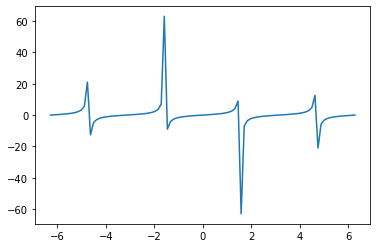

In [24]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
tan_y = np.tan(x)
plt.plot(x, tan_y)

### Tangent Function

The periodic sharp spikes that we see in the plot are known as vertical asymptotes. At those points, the value isn't defined but the limit approaches either negative or positive infinity (depending on which direction you're approaching the x value from).
The key takeaway from the plot is how the tangent function is a repeating, periodic function. A periodic function is one that returns the same value at regular intervals. Let's look at a table of some values from the tangent function:

```
x	tan(x)
-pi	0
0	0
pi	0
```

The tangent function repeats itself every π, which is known as the period. The tangent function isn't known to be used as an activation function in neural networks (or any machine learning model really) because the periodic nature isn't a pattern that's found in real datasets.
While there have been some experiments with periodic functions as the activation function for neural networks, the general conclusion has been that period functions like tangent don't offer any unique benefits for modeling.
Generally speaking, the activation functions that are used in neural networks are increasing functions. An increasing function f is a function where f(x) always stays the same or increases as x increases.

All of the activation functions we've looked at meet this criteria.

### Hyperbolic Tangent Function
While the tangent function describes the ratio of the y and x values on the unit circle, the hyperbolic tangent function describes the ratio of y and x values on the unit hyperbola. 

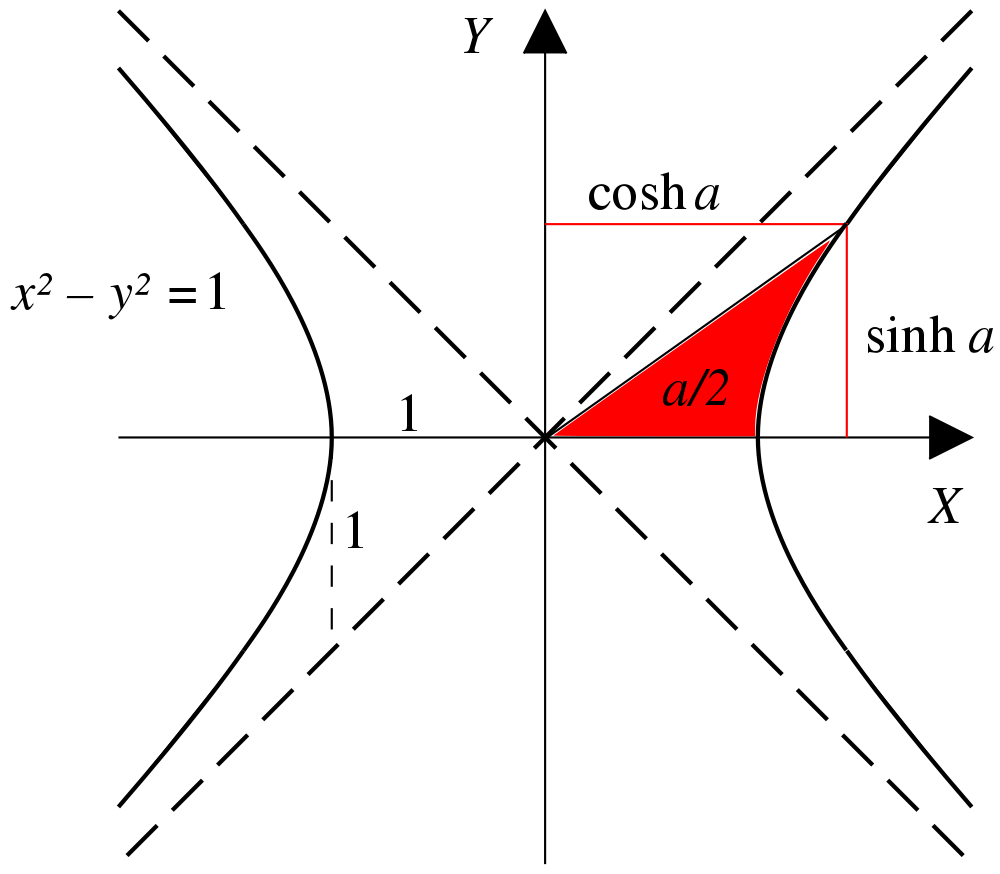

Below, we will:

- Use the `numpy.tanh()` function to compute the hyperbolic tangent of the values in `x` and assign the returned value to `tanh_y`.
- Print both `x` and `tanh_y`.
- Generate a line plot with `x` on the `x-axis` and `tanh_y` on the `y-axis`.

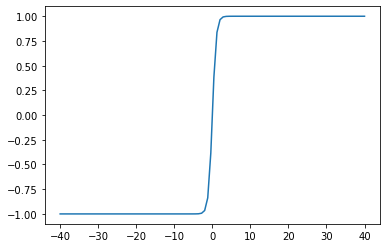

In [25]:
x = np.linspace(-40, 40, 100)
tanh_y = np.tanh(x)
plt.plot(x, tanh_y)

We cab notice that like the sigmoid function, the tanh function has horizontal asymptotes as x approaches negative or positive infinity. In addition, the tanh function also constrains the range (y) to between −1 and 1. Because of this property, both the sigmoid and the tanh functions are commonly used in neural networks for classification tasks.

The ReLU function, on the other hand, is known to be more effective in regression tasks.

## Sec-III: Hidden Layers

In the last 2 missions, we worked with **single layer neural networks**. These networks had a single layer of neurons. To make a prediction, a single layer of neurons in these networks directly fed their results into the output neuron(s).

In this section, we'll explore how multi-layer networks (also known as deep neural networks) are able to better capture nonlinearity in the data. In a deep neural network, the first layer of input neurons feeds into a second, intermediate layer of neurons. Here's a diagram representing this architecture:

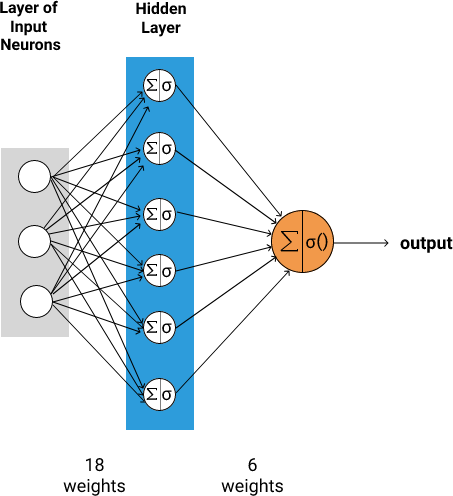



We included both of the functions that are used to compute each hidden neuron and output neuron to help clear up any confusion. We'll notice that the number of neurons in the second layer was more than those in the input layer. Choosing the number of neurons in this layer is a bit of an art form and not quite a science yet in neural network literature. We can actually add more intermediate layers, and this often leads to improved model accuracy (because of an increased capability in learning nonlinearity).
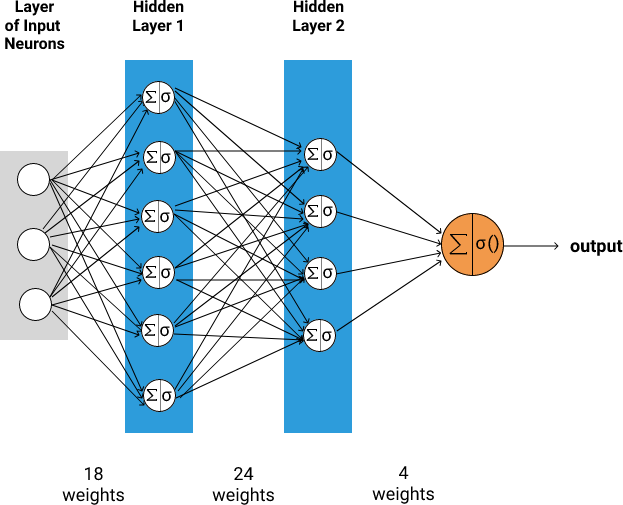

The intermediate layers are known as hidden layers, because they aren't directly represented in the input data or the output predictions. Instead, we can think of each hidden layer as intermediate features that are learned during the training process.

**Comparison With Decision Tree Models**

This is actually very similar to how decision trees are structured. The branches and splits represent some intermediate features that are useful for making predictions and are analogous to the hidden layers in a neural network:

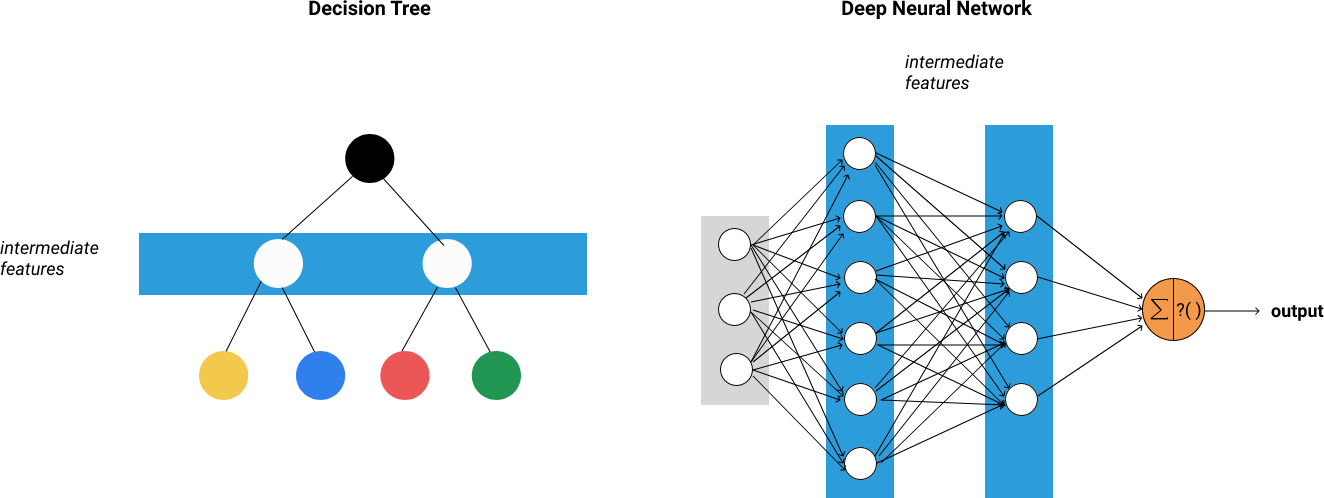

Each of these hidden layers has its own set of weights and biases, which are discovered during the training process. In decision tree models, the intermediate features in the model represented something more concrete we can understand (feature ranges).

Decision tree models are referred to as white box models because they can be observed and understood but not easily altered. After we train a decision tree model, we can visualize the tree, interpret it, and have new ideas for tweaking the model. Neural networks, on the other hand, are much closer to being a black box. In a black box model, we can understand the inputs and the outputs but the intermediate features are actually difficult to interpret and understand. Even harder and perhaps more importantly, it's difficult to understand how to tweak a neural network based on these intermediate features.

In this section, we'll learn how adding more layers to a network and adding more neurons in the hidden layers can improve the model's ability to learn more complex relationships.

### Generating Data with Nonlinearity

To generate data with nonlinearity in the features (both between the features and between the features and the target column), we can use the `make_moons()` function from scikit-learn. By default, `make_moons()` will generate 100 rows of data with 2 features. Here's a plot that visualizes one feature against the other:

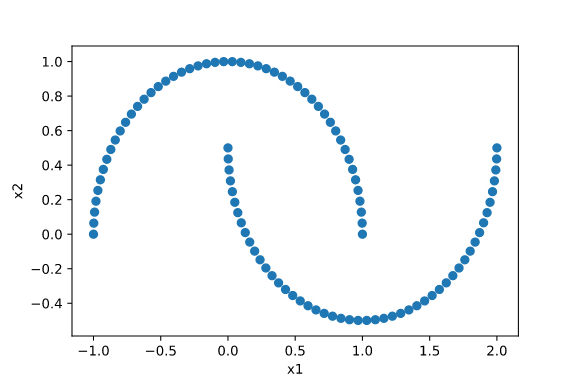

We can add some [Gaussian noise](https://en.wikipedia.org/wiki/Gaussian_noise) to the data. Gaussian noise is a kind of statistical noise that follows the Gaussian distribution, and it's a common way to try to recreate the noise that's often found in real world data. We can use the `noise` parameter to specify the standard deviation of the Gaussian noise we want added to the data. We'll also set the `random_state` to 3 so the generated data can be recreated. Then, just as before, we can separate the resulting NumPy object into 2 pandas dataframes i.e. `features` and `labels`. 

We will then:
- Generate a 3d scatter plot of the data:
 - Create a matplotlib figure object and set to `figsize` to (8,8).
 - Create and attach single axes object to this figure using the 3d projection: `ax = fig.add_subplot(111, projection='3d')`
- Generate a 3d scatter plot with the first column from `features` on the `x-axis`, the second column from `features` on the `y-axis` and `labels` on the z-axis.
- Set the labels `'x1'`, `'x2'` and `'y'`, respectively.

Text(0.5, 0, 'y')

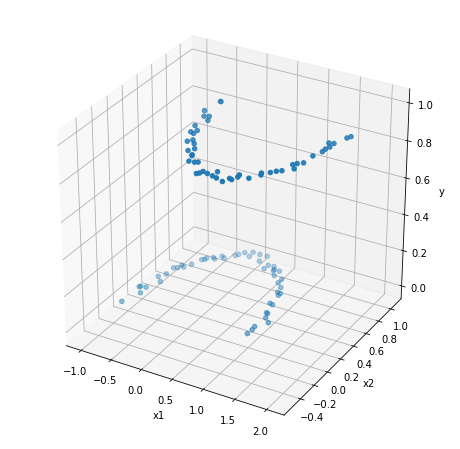

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons

data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(features[0], features[1], labels)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

### Hidden Layer with a Single Neuron

We have already seen how adding a nonlinear activation function expanded the range of patterns that a model could try to learn. 

We can think of a logistic regression model as a neural network with an activation function but no hidden layers. To make predictions, a linear combination of the features and weights is performed followed by a single sigmoid transformation.

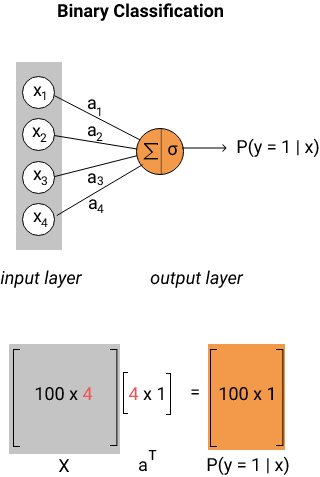

To improve the expressive power, we can add a hidden layer of neurons in between the input layer and the output layer. Here's an example where we've added a single hidden layer with a single neuron in between the input layer and the output layer:

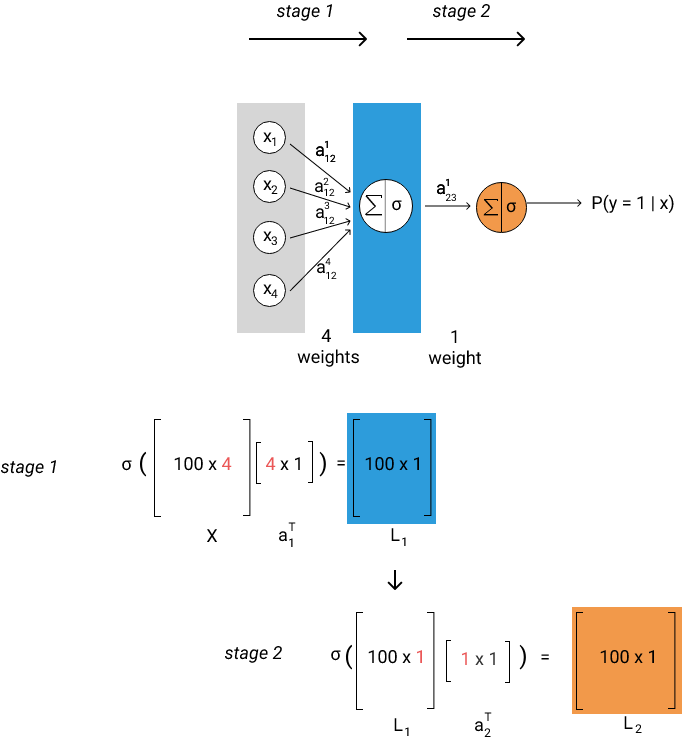

This network contains two sets of weights that are learned during the training phase:

- 4 weights between the input layer and the hidden layer
- 1 weight between the hidden layer and the output layer

### Training a Neural Network using Scikit Learn

Scikit-learn contains two classes for working with neural networks:

- [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

**MLP: Multi-layer Perception**

As with all of the model classes in scikit-learn, MLPClassifier follows the standard `model.fit()` and `model.predict()` pattern:
```
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
predictions = mlp.predict(X_test)
```

We can specify the number of hidden neurons we want to use in each layer using the hidden_layer_sizes parameter. This parameter accepts a tuple where the index value corresponds to the number of neurons in that hidden layer. The parameter is set to the tuple (100,) by default, which corresponds to a hundred neurons in a single hidden layer. The following code specifies a hidden layer of six neurons:

```
mlp = MLPClassifier(hidden_layer_sizes=(6,))
```

We can specify the activation function we want used in all layers using the activation parameter. This parameter accepts only the following string values:

- `'identity'`: the identity function
- `'logistic'`: the sigmoid function
- `'tanh'`: the hyperbolic tangent (tanh) function
- `'relu'`: the ReLU function

Here's a model instantiated with the sigmoid activation function:
```
mlp = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic')
```
While scikit-learn is friendly to use when learning new concepts, it has a few limitations when it comes to working with neural networks in production.

- At this time, scikit-learn only supports using the same activation function for all layers.
- Scikit-learn also struggles to scale to larger datasets.
- Libraries like [Theano](http://deeplearning.net/software/theano/) and [TensorFlow](https://www.tensorflow.org/) support offloading some computation to the GPU to overcome bottlenecks.

We will now, 

- Train two different models using scikit-learn on the training set:
 - A standard logistic regression model
 - A neural network with:
  - A single hidden layer
  - A single neuron in the hidden layer
  - The sigmoid activation function
- Make and assign predictions
 - Make predictions on the test set using the neural network model and assign to `nn_predictions`
 - Make predictions on the test set using the logistic regression model and assign to `log_predictions`
- Compute the [accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) with scikit-learn for `log_predictions` and assign to `log_accuracy`.
- Compute the accuracy score for `nn_predictions` and assign to` nn_accuracy`.
- Print both `log_accuracy` and `nn_accuracy`.

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
np.random.seed(8)

data = make_moons(100, random_state=3, noise=0.04)
features = pd.DataFrame(data[0])
labels = pd.Series(data[1])
features["bias"] = 1

# Shuffle the dataset and assign to training and test sets in 50% proportion

shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]

# Use one neuron for hidden layer

mlp = MLPClassifier(hidden_layer_sizes=(1,), activation='logistic')
mlp.fit(train_features, train_labels)
nn_predictions = mlp.predict(test_features)

# Apply logistic regression
lr = LogisticRegression()
lr.fit(train_features, train_labels)
log_predictions = lr.predict(test_features)

# Calculate accuracy score
nn_accuracy = accuracy_score(test_labels, nn_predictions)
log_accuracy = accuracy_score(test_labels, log_predictions)

print("Logistic Regression Model Accuracy: ", log_accuracy)
print("Single Neuron Single Layer NN Model Accuracy: ", nn_accuracy)

Logistic Regression Model Accuracy:  0.88
Single Neuron Single Layer NN Model Accuracy:  0.48


### Hidden Layer with Multiple Neurons

Above, we trained a logistic regression model and a neural network model with a hidden layer containing a single neuron. While it is not recommended to use the accuracy scores to benchmark classification models in a production setting, they can be helpful when we're learning and experimenting because they are easy to understand. 

The logistic regression model performed much better (accuracy of 88%) compared to the neural network model with one hidden layer and one neuron (48%). This network architecture doesn't give the model much ability to capture nonlinearity in the data unfortunately, which is why logistic regression performed much better.

Let's take a look at a network with a single hidden layer of multiple neurons:

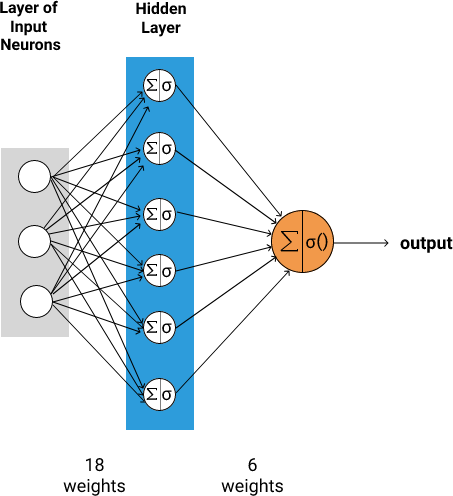

This network has 3 input neurons, 6 neurons in the single hidden layer, and 1 output neuron. We can notice that there's an arrow between every input neuron and every hidden neuron (3 x 6 = 18 connections), representing a weight that needs to be learned during the training process. We can also notice that there's also a weight that needs to be learned between every hidden neuron and the final output neuron (6 x 1 = 6 connections).

Because every neuron has a connection between itself and all of the neurons in the next layer, this is known as a fully connected network. Lastly, because the computation flows from left (input layer) to right (hidden layer then to output layer), we can call this network a **fully connected, feedforward network**.

There are two weight matrices (a1 and a2) that need to be learned during the training process, one for each stage of the computation. Let's look at the linear algebra representation of this network.

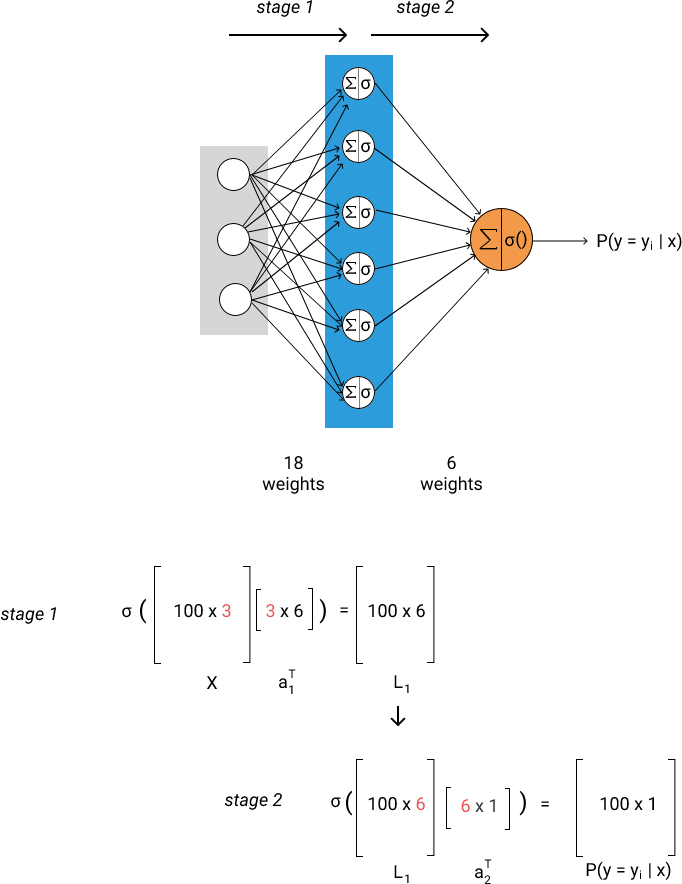

While we've discussed different architectures a deep neural network boils down to a series of matrix multiplications paired with nonlinear transformations! These are the key ideas that underlie all neural network architectures. Take a look at this conceptual diagram from the Asimov Institute that demonstrates a variety of neural network architectures:

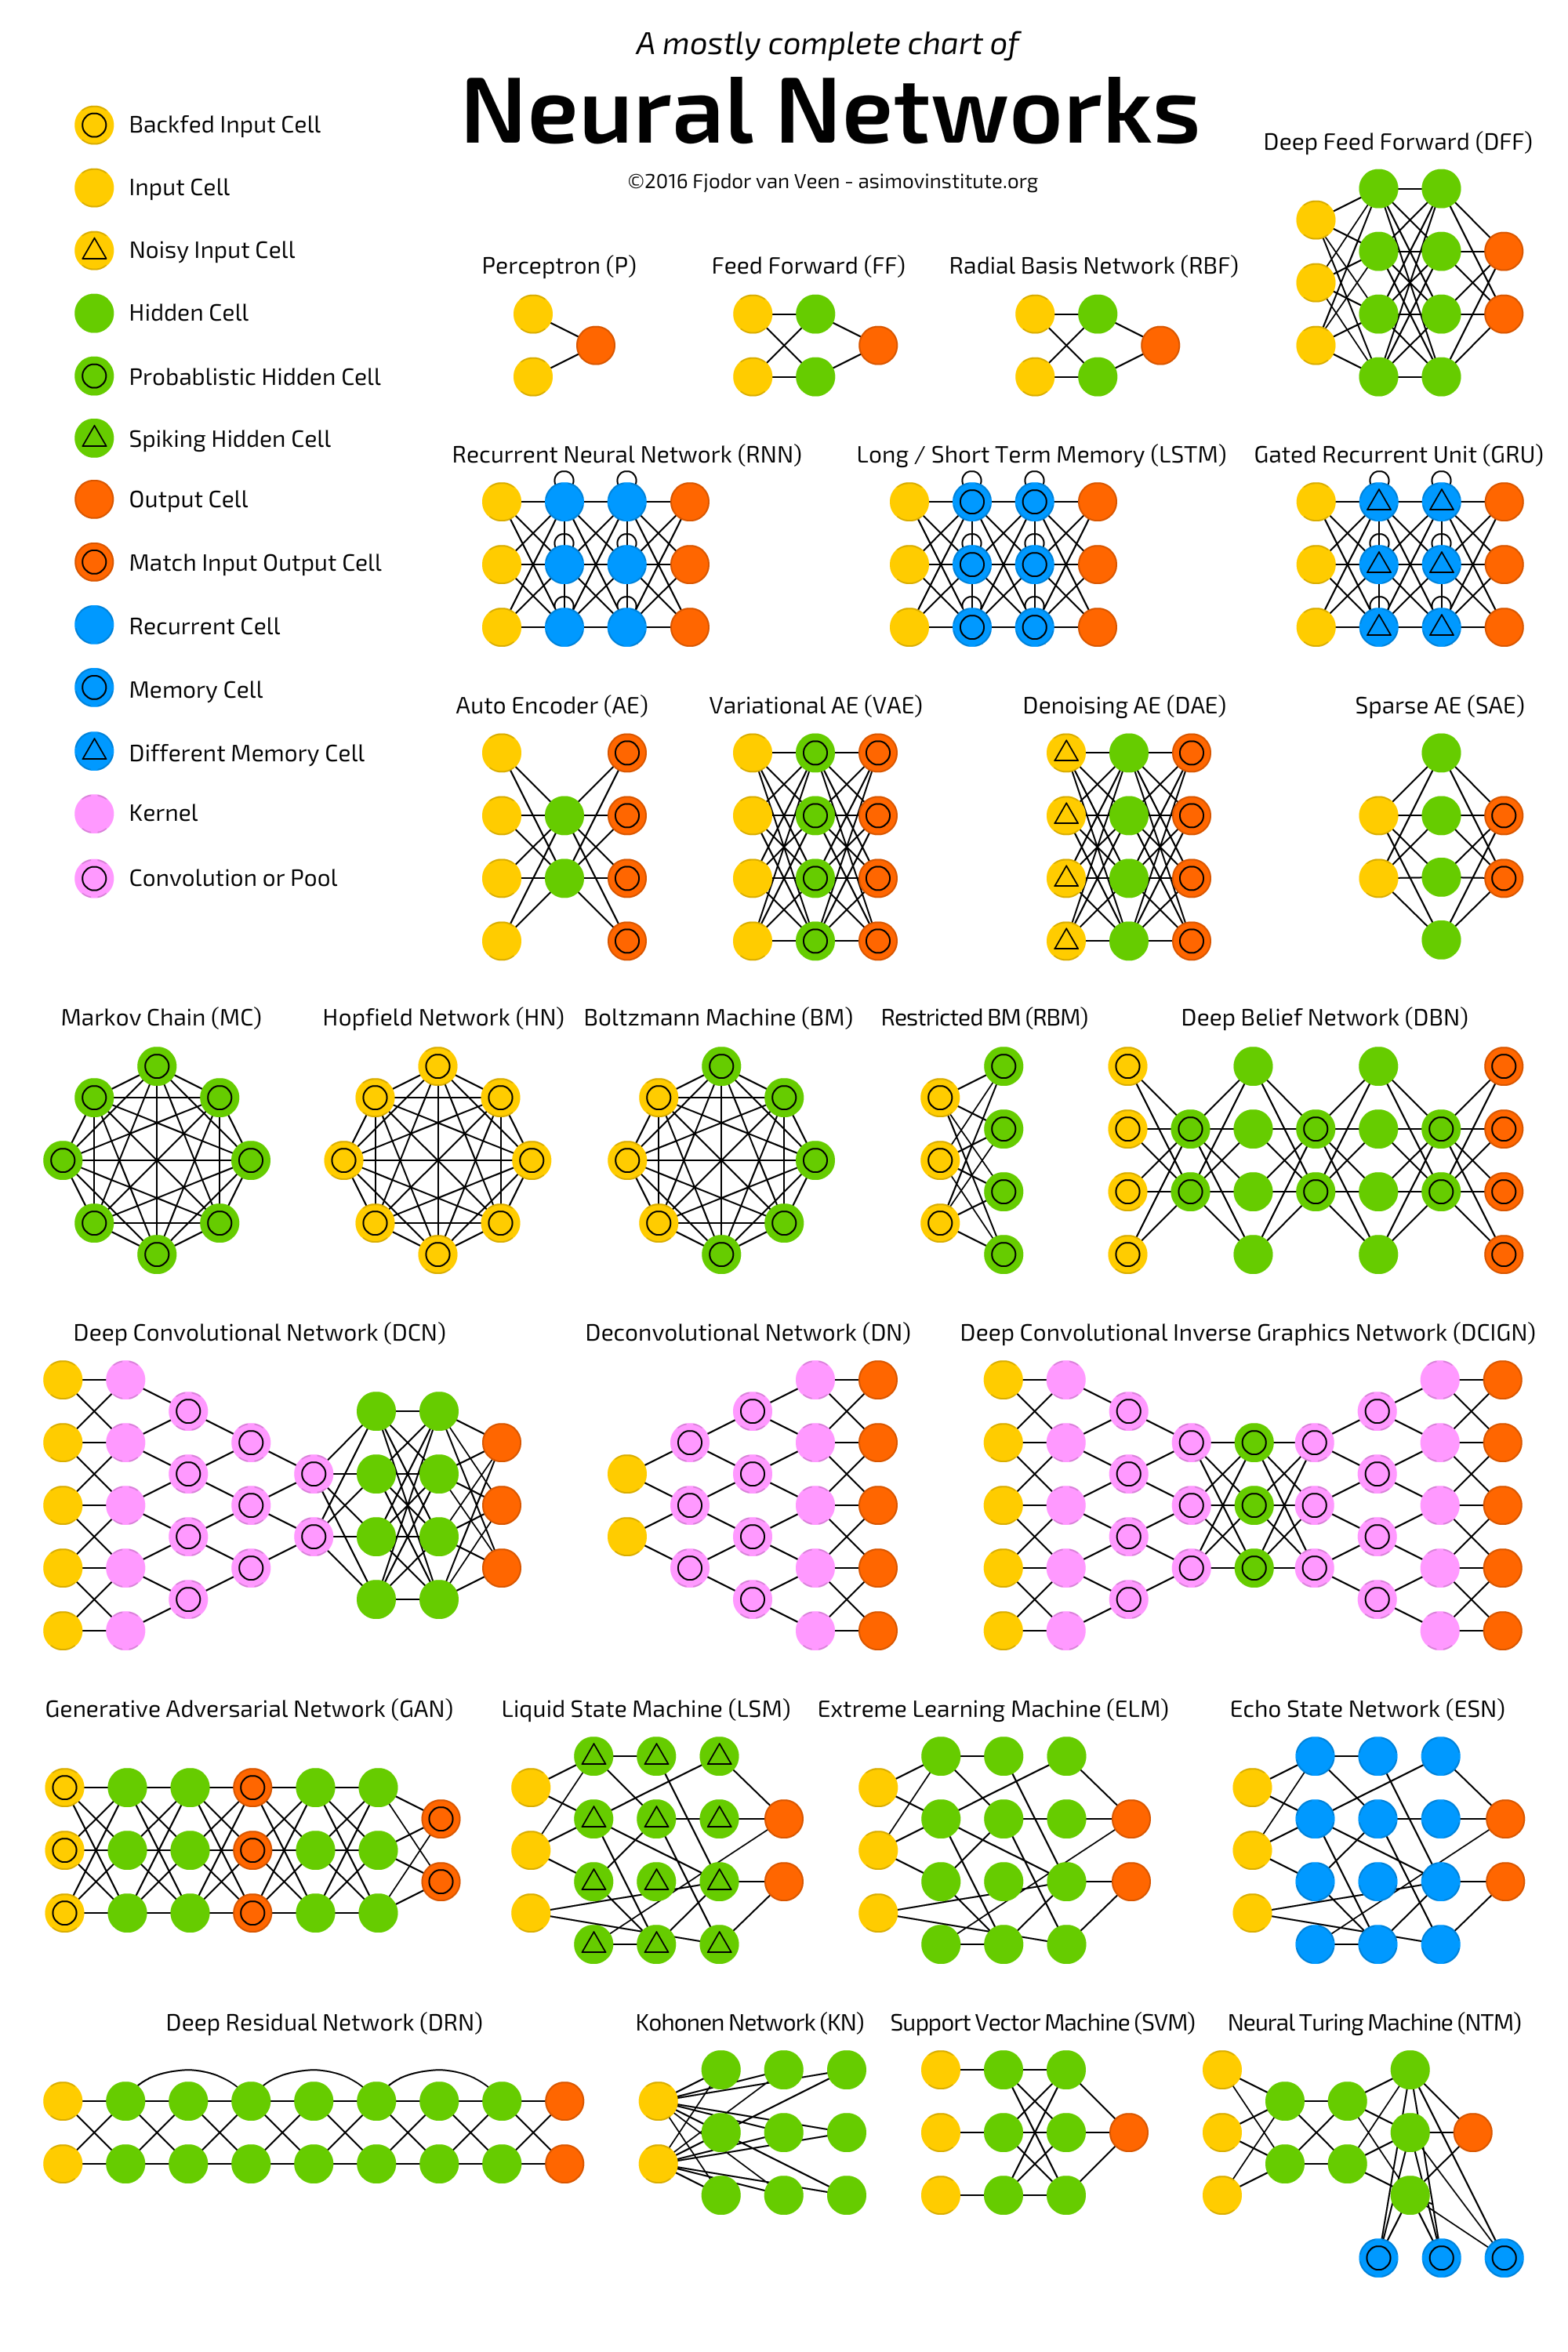

We will now experiment with adding more neurons to the hidden layer in the neural network from the last screen and see how the accuracy changes.
Below, we will:

- Create the following list of neuron counts and assign to `neurons`: [1, 5, 10, 15, 20, 25]
- Create an empty list named `accuracies`.
- For each value in neurons:
 - Train a neural network:
 - with the number of neurons in the hidden layer set to the current value
 - using the sigmoid activation function
 - on the training set
- Make predictions on the test set and compute the accuracy value.
- Append the accuracy value to `accuracies`.
- Print `accuracies`.

In [34]:
np.random.seed(8)
shuffled_index = np.random.permutation(features.index)
shuffled_data = features.loc[shuffled_index]
shuffled_labels = labels.loc[shuffled_index]
mid_length = int(len(shuffled_data)/2)
train_features = shuffled_data.iloc[0:mid_length]
test_features = shuffled_data.iloc[mid_length:len(shuffled_data)]
train_labels = shuffled_labels.iloc[0:mid_length]
test_labels = shuffled_labels.iloc[mid_length: len(labels)]
neurons = [1, 5, 10, 15, 20, 25]
accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic', max_iter = 2000) # set max_iter to 2000 to allow convergence
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    accuracy = accuracy_score(test_labels, nn_predictions)
    accuracies.append(accuracy)
    
print(accuracies)

[0.48, 0.84, 0.88, 0.88, 0.88, 0.88]


### Multiple Hidden Layers

It seems like the test set prediction accuracy improved to 0.84 when using ten or fifteen neurons in the hidden layer. As we increased the number of neurons in the hidden layer, the accuracy vastly improved between the models. 

Next, we can observe the effect of increasing the number of hidden layers on the overall accuracy of the network. Here's a diagram representing a neural network with six neurons in the first hidden layer and four neurons in the second hidden layer:

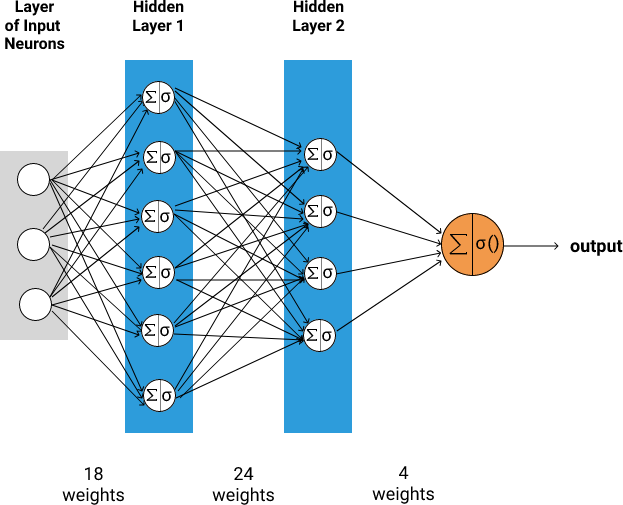

To determine the number of weights between the layers, multiply the number of neurons between those two layers.These weights will be represented as weight matrices.

To specify the number of hidden layers and the number of neurons in each hidden layer, we change the tuple we pass in to the `hidden_layer_sizes` parameter:
```
# Network with 2 hidden layers, 1 neuron in each hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(1,1), activation='logistic')

# Network with 3 hidden layers of varying neuron counts in each hidden layer
mlp = MLPClassifier(hidden_layer_sizes=(2,6,10), activation='logistic')
```
The number of hidden layers and number of neurons in each hidden layer are hyperparameters that act as knobs for the model behavior.

We will now train the following neural network models:

- model with two hidden layers, each with one neuron
- model with two hidden layers, each with five neurons
- model with two hidden layers, each with ten neurons
- model with two hidden layers, each with fifteen neurons
- model with two hidden layers, each with twenty neurons
- model with two hidden layers, each with twenty five neurons

We will also switch the activation function used in the hidden layers to the `ReLU` function.

Neural networks often tend to take a long time to converge during the training process and many libraries have default values for the number of iterations of gradient descent to run. We can increase the number of iterations of gradient descent that's performed during the training process by modifying the `max_iter parameter`, which is set to `200` by default.

```
mlp = MLPClassifier(hidden_layer_sizes=(1,1), activation='relu', max_iter=1000)
```
When training this model locally, scikit-learn will output a warning message when all iterations of gradient descent occurred but the model han't converged yet.


Below, we will:

- Create the following list of neuron counts and assign to `neurons`: `[1, 5, 10, 15, 20, 25]`
- Create an empty list named `nn_accuracies`.
- For each value in neurons:
 - Train a neural network:
  - with two hidden layers, each containing the same number of neurons (the current value in neurons)
  - using the `relu` activation function
  - using `1000` iterations of gradient descent
  - on the training set
- Make predictions on the test set and compute the accuracy value.
- Append the accuracy value to `nn_accuracies`.
- Print `nn_accuracies`.

In [35]:
neurons = [1, 5, 10, 15, 20, 25]
nn_accuracies = []

for n in neurons:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n), activation='relu', max_iter=1000) # n neurons per layer for two layers
    
    mlp.fit(train_features, train_labels)
    nn_predictions = mlp.predict(test_features)
    
    accuracy = accuracy_score(test_labels, nn_predictions)
    nn_accuracies.append(accuracy)

print(nn_accuracies)

[0.88, 0.88, 1.0, 1.0, 1.0, 1.0]


As we increased the number of neurons in each layer, it looks like the accuracy increased all the way to 100%! Even though this is a toy dataset (most real world data is much noisier), this is impressive and demonstrates the ability of neural networks to learn more complex decision boundaries.